# Preface

## Problem Breakdown

The following are questions that serve as a basis for the analysis:

1. How were the monthly sales trends from Q1 2017 to Q3 2018?

2. Which category was purchased the most each quarter?

3. Which store had the highest sales?

4. During which week of the year do people tend to make the most purchases?

5. Which product had the highest sales volume?

6. On which date was the highest number of purchases made in Q4 2017?

7. What are the mean, median, standard deviation, skewness, and kurtosis for product prices, units sold, and revenue?

8. Was there a significant relationship between product price and units sold in Q4 2017?

9. How was the revenue distribution in Q3 2017 and Q4 2017?

10. Was there a significant difference in revenue growth between Q3 2017 to Q4 2017 and Q3 2018 to Q4 2018?

11. Is there a relationship between product categories and the tendency to make bulk purchases?

12. What are the estimated minimum and maximum revenue increases based on the percentage growth between Q3 2017 and Q4 2017?

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

# Load Data

In [2]:
# Reading the files into a DataFrame
sales = pd.read_csv('sales.csv')
stores = pd.read_csv('stores.csv')
products = pd.read_csv('products.csv')
inventory = pd.read_csv('inventory.csv')

# Data Exploration

## Summary Information

### Sales Table

In [3]:
# Display summary information sales table
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Sale_ID     829262 non-null  int64 
 1   Date        829262 non-null  object
 2   Store_ID    829262 non-null  int64 
 3   Product_ID  829262 non-null  int64 
 4   Units       829262 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 31.6+ MB


Based on the summary information of the sales table, it is known that:
- There are 829,262 rows across 5 columns.
- The Date column is still of type object, although it should be in datetime format as it represents dates.
- There are no missing values (all columns have 829,262 non-null counts out of a total of 829,262 rows).

### Products Tabel

In [4]:
# Display summary information product table
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        35 non-null     int64 
 1   Product_Name      35 non-null     object
 2   Product_Category  35 non-null     object
 3   Product_Cost      35 non-null     object
 4   Product_Price     35 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


Based on the summary information of the products table, it is known that:
- There are 35 rows across 5 columns.
- The Product_Price and Product_Cost columns are still of type object, although they should be in float format as they represent monetary values.
- There are no missing values (all columns have 35 non-null counts out of a total of 35 rows).

### Stores Tabel

In [5]:
# Display summary information stores table
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store_ID         50 non-null     int64 
 1   Store_Name       50 non-null     object
 2   Store_City       50 non-null     object
 3   Store_Location   50 non-null     object
 4   Store_Open_Date  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


Based on the summary information of the stores table, it is known that:
- There are 50 rows across 5 columns.
- The Store_Open_Date column is still of type object, although it should be in datetime format as it represents dates.
- There are no missing values (all columns have 50 non-null counts out of a total of 50 rows).

### Inventory Tabel

In [6]:
# Display summary information inventory table
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Store_ID       1593 non-null   int64
 1   Product_ID     1593 non-null   int64
 2   Stock_On_Hand  1593 non-null   int64
dtypes: int64(3)
memory usage: 37.5 KB


Based on the summary information of the inventory table, it is known that:
- There are 1,593 rows across 3 columns.
- There are no missing values (all columns have 1,593 non-null counts out of a total of 1,593 rows).

## Check Primary and Foreign Key

The verification of primary keys and foreign keys in the master tables (products and stores tables) and transaction tables (sales and inventory tables) is conducted to ensure that there is a proper match between them.

In [7]:
def checkPK(table, id_col, reference_table, reference_id_col, table_name, reference_table_name):
    count_false = (~table[id_col].isin(reference_table[reference_id_col])).sum()
    print(f'Number of {id_col} in {reference_table_name} table not found in {table_name} table: {count_false}')

In [8]:
checkPK(sales, 'Product_ID', products, 'Product_ID', 'sales', 'products')
checkPK(sales, 'Store_ID', stores, 'Store_ID', 'sales', 'stores')
checkPK(inventory, 'Product_ID', products, 'Product_ID', 'inventory', 'products')
checkPK(inventory, 'Store_ID', stores, 'Store_ID', 'inventory', 'stores')

Number of Product_ID in products table not found in sales table: 0
Number of Store_ID in stores table not found in sales table: 0
Number of Product_ID in products table not found in inventory table: 0
Number of Store_ID in stores table not found in inventory table: 0


All primary keys and foreign keys match.

## Check Unique Value

The verification of column names and unique values in all tables is conducted to ensure that there are no whitespace issues or data anomalies.

In [9]:
def check_tables(tables):
    for table_name, table in tables.items():
        print(f"Table: {table_name}")
        print(f"Column names: {table.columns.tolist()}")
        unique_values = table.apply(lambda x: x.unique()[:5])
        
        for column, values in unique_values.items():
            print(f"'{column}': {values.tolist()}")
        
        print("\n")

# Dictionary of tables
tables = {
    'products': products,
    'sales': sales,
    'inventory': inventory,
    'stores': stores
}

In [10]:
check_tables(tables)

Table: products
Column names: ['Product_ID', 'Product_Name', 'Product_Category', 'Product_Cost', 'Product_Price']
'Product_ID': [1, 2, 3, 4, 5]
'Product_Name': ['Action Figure', 'Animal Figures', "Barrel O' Slime", 'Chutes & Ladders', 'Classic Dominoes']
'Product_Category': ['Toys', 'Art & Crafts', 'Games', 'Electronics', 'Sports & Outdoors']
'Product_Cost': ['$9.99 ', '$1.99 ', '$7.99 ', '$6.99 ', '$11.99 ']
'Product_Price': ['$15.99 ', '$12.99 ', '$3.99 ', '$9.99 ', '$14.99 ']


Table: sales
Column names: ['Sale_ID', 'Date', 'Store_ID', 'Product_ID', 'Units']
'Sale_ID': [1, 2, 3, 4, 5]
'Date': ['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05']
'Store_ID': [24, 28, 6, 48, 44]
'Product_ID': [4, 1, 8, 7, 18]
'Units': [1, 2, 3, 4, 5]


Table: inventory
Column names: ['Store_ID', 'Product_ID', 'Stock_On_Hand']
'Store_ID': [1, 2, 3, 4, 5]
'Product_ID': [1, 2, 3, 4, 5]
'Stock_On_Hand': [27, 0, 32, 6, 79]


Table: stores
Column names: ['Store_ID', 'Store_Name', 'Store_Cit

After verifying that the column names and values are free from whitespace or other anomalies.

## Check Duplicate Value

The verification for duplicate values in all tables is performed to ensure data integrity and consistency.

In [11]:
# Loop through each table and check for duplicates
for table_name, df in tables.items():
    duplicate_count = df.duplicated().sum()
    print(f'Total duplicate values in {table_name} table: {duplicate_count}')

Total duplicate values in products table: 0
Total duplicate values in sales table: 0
Total duplicate values in inventory table: 0
Total duplicate values in stores table: 0


There are no duplicate values found in any of the tables.

# Data Cleaning

Based on the data exploration findings, data cleaning will be conducted, specifically focusing on modifying the price and date data.

## Set Price Values

### Set price value for product_price column

In [12]:
# Retrieve unique values from the `product_price` column in the `products` table.
products['Product_Price'].unique()[:5]

array(['$15.99 ', '$12.99 ', '$3.99 ', '$9.99 ', '$14.99 '], dtype=object)

The product_price column previously contained the '$' symbol, thousand separators (.), and whitespace.

In [13]:
# Remove whitespace and '$' symbol from the 'product_price' column
products['Product_Price'] = products['Product_Price'].str.strip().replace({r'\$': ''}, regex=True).astype(float).round(2)

In [14]:
# Retrieve unique values from the `product_price` column in the `products` table.
products['Product_Price'].unique()[:5]

array([15.99, 12.99,  3.99,  9.99, 14.99])

The product_price column values are now in the correct numeric format.

### Set price value for product_cost column

In [15]:
# Retrieve unique values from the `product_cost` column in the `products` table.
products['Product_Cost'].unique()[:5]

array(['$9.99 ', '$1.99 ', '$7.99 ', '$6.99 ', '$11.99 '], dtype=object)

The product_cost column previously contained the '$' symbol, thousand separators (.), and whitespace.

In [16]:
# Remove whitespace and '$' symbol from the 'Product_Cost' column
products['Product_Cost'] = products['Product_Cost'].str.strip().replace({r'\$': ''}, regex=True).astype(float).round(2)

In [17]:
# Retrieve unique values from the `Product_Cost` column in the `products` table.
products['Product_Cost'].unique()[:5]

array([ 9.99,  1.99,  7.99,  6.99, 11.99])

The product_price column values are now in the correct numeric format.

In [18]:
# Summary information of products table
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        35 non-null     int64  
 1   Product_Name      35 non-null     object 
 2   Product_Category  35 non-null     object 
 3   Product_Cost      35 non-null     float64
 4   Product_Price     35 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ KB


After updating the values, the product_cost and product_price columns now have a float data type.

## Data Type Conversion

In [19]:
# Data type conversion for Date and Store_Open_Date column 
sales['Date'] = pd.to_datetime(sales['Date'])
stores['Store_Open_Date'] = pd.to_datetime(stores['Store_Open_Date'])

In [20]:
# Check the Date column
sales['Date'].unique()[:5]

<DatetimeArray>
['2017-01-01 00:00:00', '2017-01-02 00:00:00', '2017-01-03 00:00:00',
 '2017-01-04 00:00:00', '2017-01-05 00:00:00']
Length: 5, dtype: datetime64[ns]

In [21]:
# Check the Store_Open_Date column
stores['Store_Open_Date'].unique()[:5]

<DatetimeArray>
['1992-09-18 00:00:00', '1995-04-27 00:00:00', '1999-12-27 00:00:00',
 '2000-01-01 00:00:00', '2001-05-31 00:00:00']
Length: 5, dtype: datetime64[ns]

## Export Data Cleaning Result

In [22]:
# Save the cleaned data
products.to_csv('cleaned_products.csv', index=False)
stores.to_csv('cleaned_stores.csv', index=False)
inventory.to_csv('cleaned_inventory.csv', index=False)
sales.to_csv('cleaned_sales.csv', index=False)

# Analysis

To facilitate the analysis process, it is necessary to add new columns by extracting date information from the existing sales date column, such as **date**, **month**, **year**, **week**, and **quarter**. Adding these columns aims to support more in-depth and structured data analysis, simplify data grouping based on time, and enable the creation of visualizations that are more relevant to business needs.

In [23]:
# Convert the 'Date' column to datetime format
sales['Date'] = pd.to_datetime(sales['Date'])

# Extract day, month, year, and quarter from the 'Date' column
sales['Day'] = sales['Date'].dt.day.astype(int)
sales['Month'] = sales['Date'].dt.month.astype(int)
sales['Year'] = sales['Date'].dt.year.astype(int)
sales['Quarter'] = sales['Date'].dt.to_period('Q').astype(str)

sales

,Sale_ID,Date,Store_ID,Product_ID,Units,Day,Month,Year,Quarter
0,1,2017-01-01,24,4,1,1,1,2017,2017Q1
1,2,2017-01-01,28,1,1,1,1,2017,2017Q1
2,3,2017-01-01,6,8,1,1,1,2017,2017Q1
3,4,2017-01-01,48,7,1,1,1,2017,2017Q1
4,5,2017-01-01,44,18,1,1,1,2017,2017Q1
...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,24,19,1,30,9,2018,2018Q3
829258,829259,2018-09-30,16,35,1,30,9,2018,2018Q3
829259,829260,2018-09-30,22,19,1,30,9,2018,2018Q3
829260,829261,2018-09-30,13,2,2,30,9,2018,2018Q3


##  1. How were the monthly sales trends from Q1 2017 to Q3 2018?

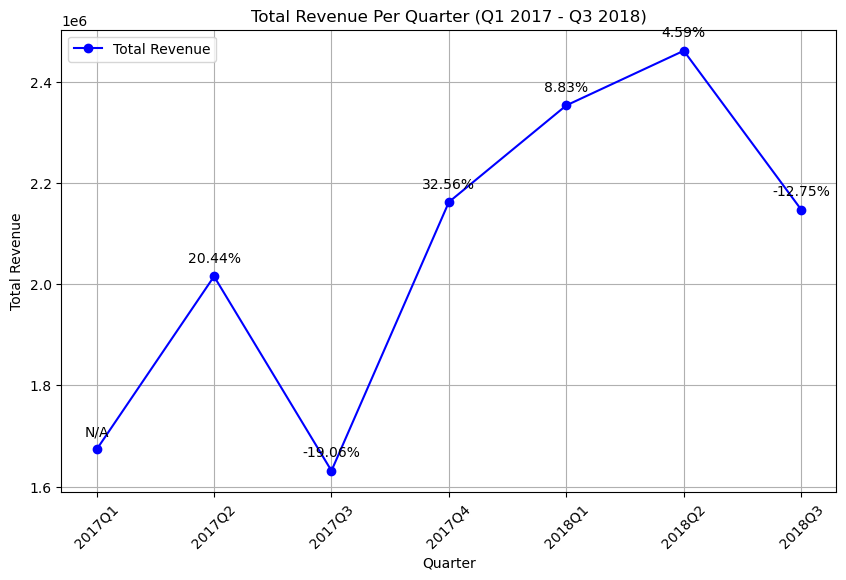

In [24]:
# Merge sales data (sales table) with product price column (products table) based on 'Product_ID'
sales_product = pd.merge(sales, products[['Product_ID', 'Product_Price']], on='Product_ID')

# Calculate total revenue by multiplying units sold by product price
sales_product['Revenue'] = sales_product['Units'] * sales_product['Product_Price']

# Group data by 'quarter' and calculate total revenue per quarter
quarterly_revenue = sales_product.groupby('Quarter', as_index=False)['Revenue'].sum()

# Calculate the percentage change in revenue from the previous quarter
quarterly_revenue['Revenue Change(%)'] = quarterly_revenue['Revenue'].pct_change() * 100
quarterly_revenue['Revenue Change(%)'] = quarterly_revenue['Revenue Change(%)'].apply(lambda x: f"{x:.2f}%" if pd.notnull(x) else "N/A")
quarterly_revenue['Quarter'] = quarterly_revenue['Quarter'].astype(str)

# Create a line plot for total revenue per quarter
plt.figure(figsize=(10, 6))
plt.plot(quarterly_revenue['Quarter'], quarterly_revenue['Revenue'], marker='o', color='b', label='Total Revenue')
plt.title('Total Revenue Per Quarter (Q1 2017 - Q3 2018)')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Add annotations for percentage change on the plot
for i in range(len(quarterly_revenue)):
    plt.annotate(quarterly_revenue['Revenue Change(%)'].iloc[i],
                 (quarterly_revenue['Quarter'].iloc[i], quarterly_revenue['Revenue'].iloc[i]),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

plt.grid()
plt.legend()
plt.show()

Overall, **sales show a significant upward trend in the final quarter of the year** (Q4 2017), likely driven by the holiday season, when many parents purchase toys as gifts for their children. Toy demand typically increases toward the end of the year, in line with the tradition of giving gifts during Christmas and New Year's. However, **there are several periods of decline**, particularly noticeable in Q3 2017 and Q3 2018, which may be attributed to a decrease in shopping interest after the major shopping periods in Q2, and possibly because consumers focus more on daily necessities rather than toy purchases.

## 2. Which category was purchased the most each quarter?

<Figure size 1200x600 with 0 Axes>

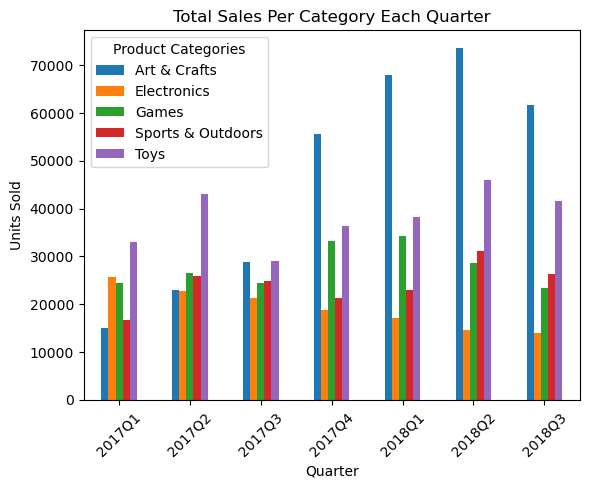

In [25]:
# Calculating total sales per category per quarter
category_sales = sales.groupby(['Quarter', 'Product_ID']).agg({'Units': 'sum'}).reset_index()
category_sales = category_sales.merge(products[['Product_ID', 'Product_Category']], on='Product_ID')

# Visualization
plt.figure(figsize=(12, 6))
category_sales.groupby(['Quarter', 'Product_Category']).sum()['Units'].unstack().plot(kind='bar')
plt.title('Total Sales Per Category Each Quarter')
plt.ylabel('Units Sold')
plt.xlabel('Quarter')
plt.legend(title='Product Categories')
plt.xticks(rotation=45)
plt.show()

The most frequently purchased product category is **Art & Crafts**, which shows consistent dominance in sales from **Q4 2017 to Q3 2018 (4 quarters)**. Meanwhile, the **Toys** category also recorded strong performance, being the best-selling category for three consecutive quarters, from **Q1 2017 to Q3 2017**. The significant sales from these two categories reflect strong consumer preferences for these products during the analysis period.

The leading categories, **Art & Crafts** and **Toys**, were driven by parents' interest in purchasing educational toys for their children, as parents prefer products that can stimulate creativity. These two categories were more popular compared to **Electronics**, **Sport**, and **Games**, because consumers visiting Maven Toys tend to search for toys rather than other categories. Additionally, the prices for the other three categories were generally higher.

## 3. Which store had the highest sales?

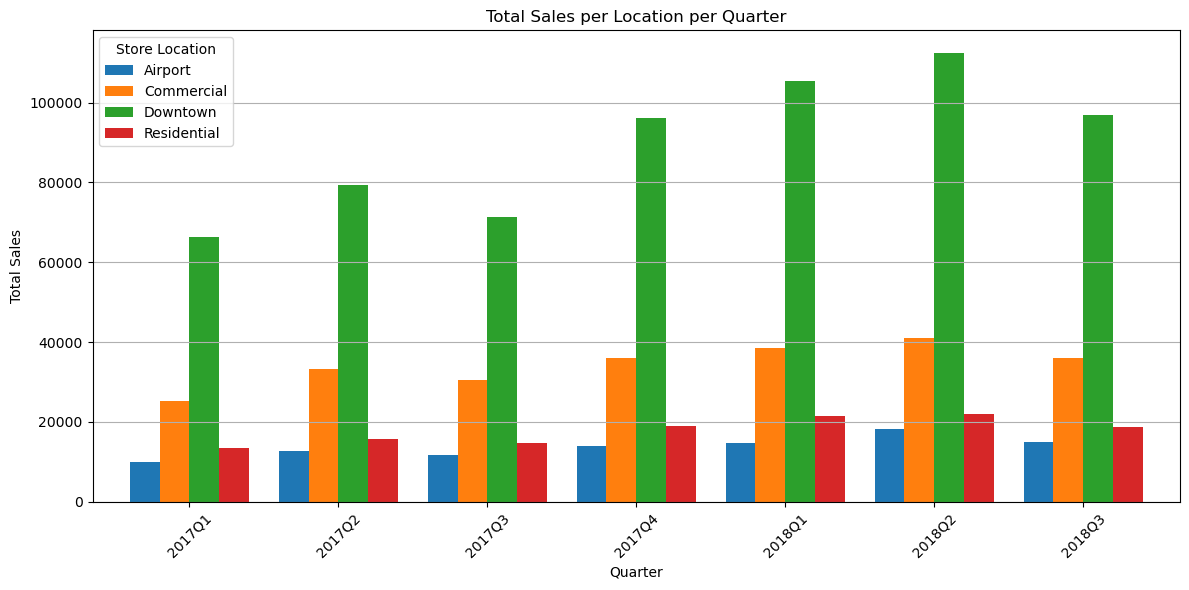

In [26]:
# Merging sales data (sales table) with store location data (store table) based on 'Store_ID'
sales_stores = pd.merge(sales, stores[['Store_ID', 'Store_Location']], on='Store_ID')

# Calculating total sales per location per quarter
total_sales_by_location_quarter = sales_stores.groupby(['Quarter', 'Store_Location'])['Units'].sum().reset_index()

# Getting the list of quarters and store locations
quarters = total_sales_by_location_quarter['Quarter'].unique()
store_locations = total_sales_by_location_quarter['Store_Location'].unique()

# Creating a pivot table for easier plotting
pivot_table = total_sales_by_location_quarter.pivot(index='Quarter', columns='Store_Location', values='Units')

# Creating a bar plot for total sales per location per quarter
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=False, width=0.8, ax=plt.gca())

# Adding title and labels
plt.title('Total Sales per Location per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Store Location')
plt.grid(axis='y')

# Displaying the plot
plt.tight_layout()
plt.show()

Stores located in **Downtown** show **significantly higher sales** in each quarter, performing much better compared to stores located in **airports**, **commercial areas**, and **residential areas**. This reflects the greater consumer appeal of the Downtown location.

The higher sales in **Downtown** are likely due to the fact that central urban locations have **more foot traffic and vehicle movement**, as they serve as hubs for business, office spaces, and entertainment. This attracts **more potential customers** compared to areas like **airports** or **commercial areas**, which may have a more limited flow of visitors.

## 4. During which week of the year do people tend to make the most purchases?

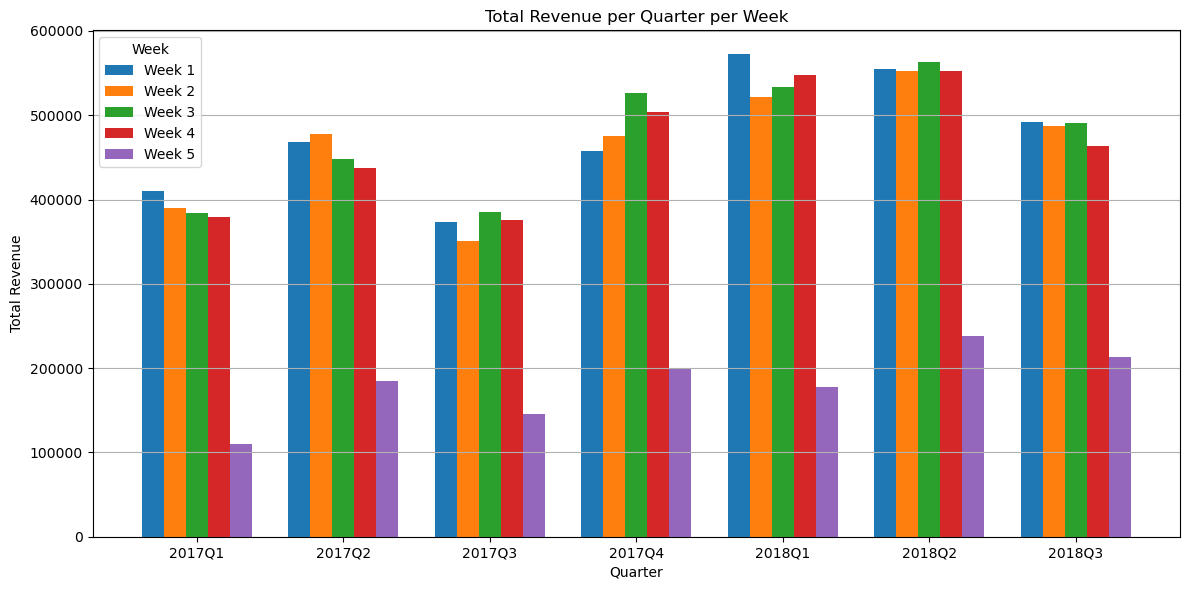

In [27]:
# Adding week column in the month
sales['Week'] = (sales['Date'].dt.day - 1) // 7 + 1  

# Merging Sales and Products tables to calculate revenue
sales_product = pd.merge(sales, products[['Product_ID', 'Product_Price']], on='Product_ID')

# Calculating revenue (total income)
sales_product['Revenue'] = sales_product['Units'] * sales_product['Product_Price']
total_revenue_by_week_quarter = sales_product.groupby(['Quarter', 'Week'])['Revenue'].sum().reset_index()

# Defining bar positions for each week
weeks = total_revenue_by_week_quarter['Week'].unique()
bar_width = 0.15  # Bar width
indices = np.arange(len(total_revenue_by_week_quarter['Quarter'].unique()))

# Creating total revenue per quarter per week visualization
plt.figure(figsize=(12, 6))

for i, week in enumerate(weeks):
    week_data = total_revenue_by_week_quarter[total_revenue_by_week_quarter['Week'] == week]
    plt.bar(indices + i * bar_width, week_data['Revenue'], width=bar_width, label=f'Week {week}')

plt.title('Total Revenue per Quarter per Week')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(indices + bar_width * (len(weeks) - 1) / 2, total_revenue_by_week_quarter['Quarter'].unique())
plt.legend(title='Week')
plt.grid(axis='y') 
plt.tight_layout() 
plt.show()

Overall, **week one** and **week three** often record high sales due to special events and seasonal changes driving consumer spending. However, visually, the distribution from week 1 to 4 (with week 5 assumed to be just a few days) shows a similar spread **(uniform distribution)**. Therefore, to test whether sales per week affect revenue, an additional test using ANOVA was performed. ANOVA is used to test whether sales in each week across each quarter significantly impact revenue.

In [28]:
# Merging Sales and Products tables to calculate revenue
sales_week = pd.merge(sales, products[['Product_ID', 'Product_Price']], on='Product_ID')

# Calculating revenue (total income)
sales_week['Revenue'] = sales_week['Units'] * sales_week['Product_Price']

# Grouping by week to get total revenue per week
revenue_per_week = sales_week.groupby('Week')['Revenue'].sum().reset_index()

# Grouping data by total revenue per week per quarter
weekly_revenue = sales_week.groupby(['Quarter', 'Week'])['Revenue'].sum().reset_index()

# Performing ANOVA based on week per quarter
anova_result = stats.f_oneway(
    *[weekly_revenue[weekly_revenue['Quarter'] == quarter]['Revenue']
      for quarter in weekly_revenue['Quarter'].unique()]
)

# ANOVA Results
print(f'F-statistic: {anova_result.statistic}')
print(f'P-value: {anova_result.pvalue}')

# Interpretation of results
if anova_result.pvalue < 0.05:
    print("There is a significant difference in revenue between different weeks across quarters.")
else:
    print("There is no significant difference in revenue between different weeks across quarters.")


F-statistic: 1.1559813190384531
P-value: 0.3572922614408241
There is no significant difference in revenue between different weeks across quarters.


The ANOVA results show an **F-statistic** value of **1.156** and a **P-value** of **0.357**. Since the **p-value** is greater than 0.05, it can be concluded that there is **no significant difference** in revenue between different weeks across quarters. This means that, based on the analyzed data, the weekly revenue patterns do not differ significantly between the compared quarters.

## 5. Which product had the highest sales volume?

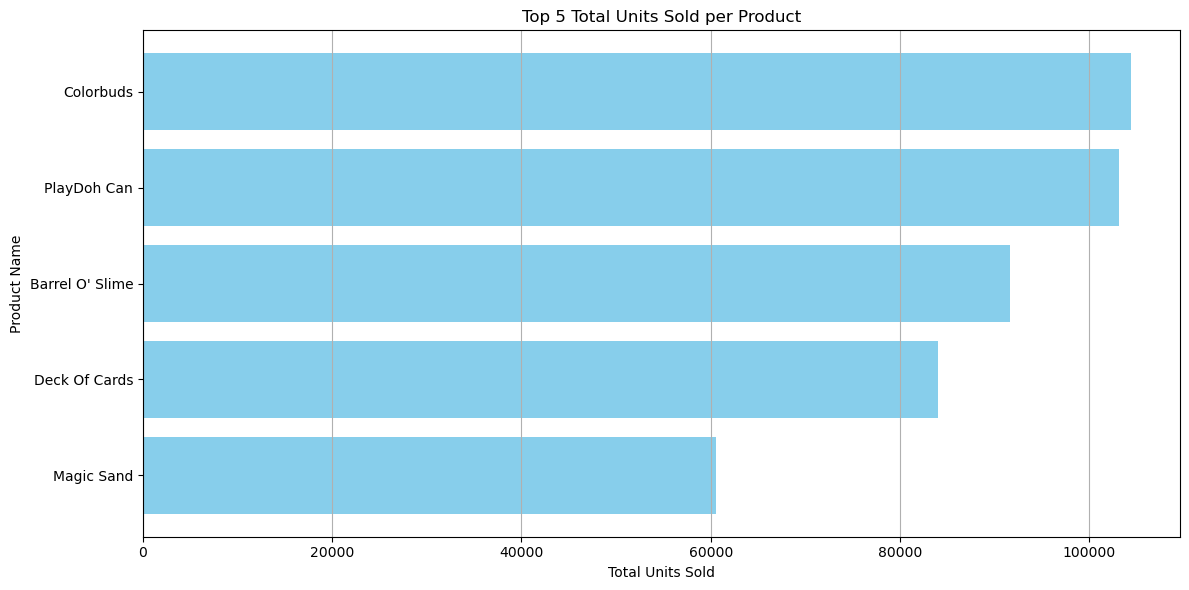

In [29]:
# Merging the Sales and Product tables
sales_product = pd.merge(sales, products, on='Product_ID')

# Calculating total units sold per product
total_units_sold = sales_product.groupby(['Product_ID', 'Product_Name'])['Units'].sum().reset_index()

# Sorting by total units sold in descending order
total_units_sold = total_units_sold.sort_values(by='Units', ascending=False)

# Selecting the top 5 products
top_5_units_sold = total_units_sold.head(5)

# Visualizing total units sold per product
plt.figure(figsize=(12, 6))
plt.barh(top_5_units_sold['Product_Name'], top_5_units_sold['Units'], color='skyblue')
plt.title('Top 5 Total Units Sold per Product')
plt.xlabel('Total Units Sold')
plt.ylabel('Product Name')
plt.gca().invert_yaxis() 
plt.grid(axis='x')  
plt.tight_layout()  
plt.show()

**Top 5 Products for the Entire Period from 2017Q1 to 2018Q3**

| No | Product Name        | Total Units Sold |
|----|---------------------|------------------|
| 1  | Colorbuds           | 104,368          |
| 2  | PlayDoh Can         | 103,128          |
| 3  | Barrel O' Slime     | 91,663           |
| 4  | Deck Of Cards       | 84,034           |
| 5  | Magic Sand          | 60,598           |

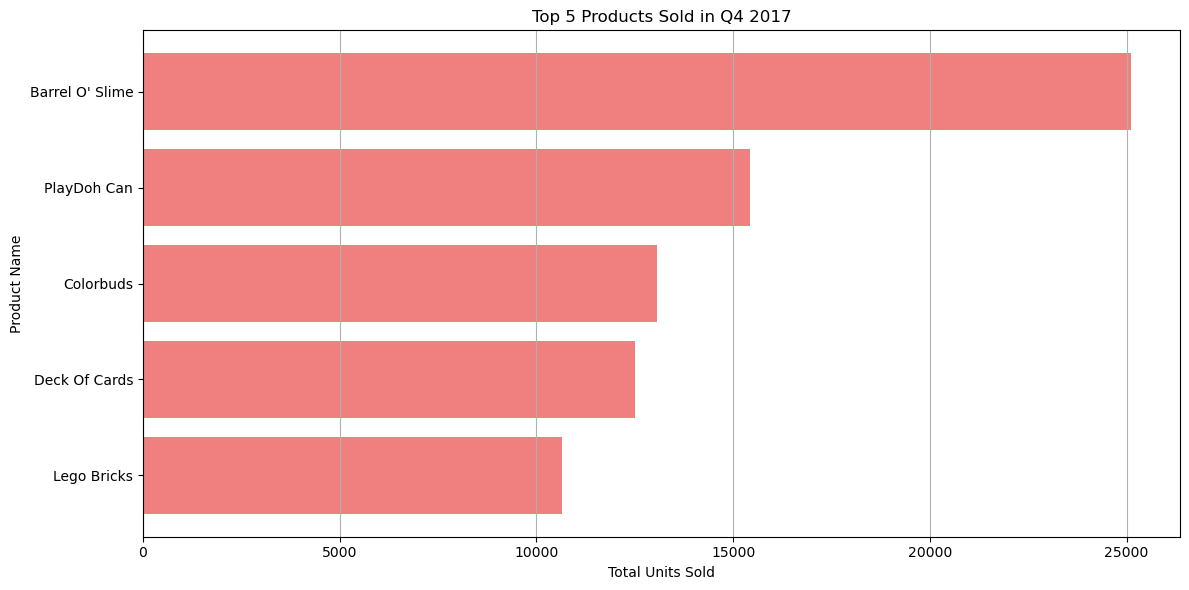

In [30]:
# Filter data for Q4 2017
q4_2017_sales = sales[(sales['Date'].dt.year == 2017) & (sales['Date'].dt.quarter == 4)]

# Merge with the products table
sales_product = pd.merge(q4_2017_sales, products, on='Product_ID')

# Calculate total units sold per product
top_products = sales_product.groupby('Product_Name')['Units'].sum().reset_index().sort_values(by='Units', ascending=False)

# Select the top 5 products
top_5_products = top_products.head(5)

# Bar chart for the top 5 products with the most units sold
plt.figure(figsize=(12, 6))
plt.barh(top_5_products['Product_Name'], top_5_products['Units'], color='lightcoral')
plt.title('Top 5 Products Sold in Q4 2017')
plt.xlabel('Total Units Sold')
plt.ylabel('Product Name')
plt.gca().invert_yaxis() 
plt.grid(axis='x')  
plt.tight_layout()  
plt.show()

**Top 5 Products in Q4 2017**

| No | Product Name        | Units Sold in Q4 2017 |
|----|---------------------|-----------------------|
| 1  | Barrel O' Slime     | 25,100                |
| 2  | PlayDoh Can         | 15,439                |
| 3  | Colorbuds           | 13,075                |
| 4  | Deck Of Cards       | 12,513                |
| 5  | Lego Bricks         | 10,660                |

These products are closely related to the most popular categories, namely **Art & Crafts** and **Toys**. **Colorbuds** and **PlayDoh Can**, which are part of the **Art & Crafts** category, reflect the interest of parents in providing toys that support children's creativity and imagination. Meanwhile, **Barrel O' Slime** and **Deck Of Cards**, which belong to the **Toys** category, show a strong appeal to children through interactive and fun games. Both categories contribute significantly to sales, reflecting that consumers prefer products that not only entertain but also offer educational and creative value in the play process.

## 6. On which date was the highest number of purchases made in Q4 2017?

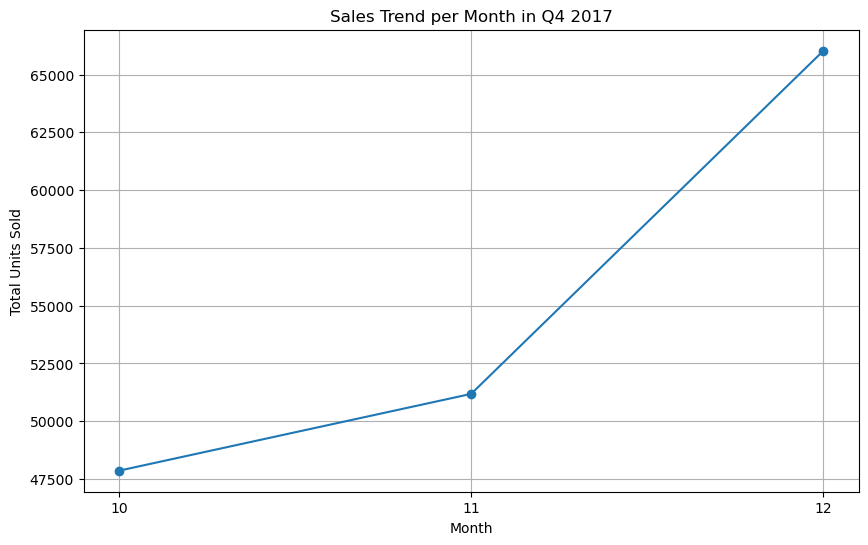

In [31]:
# Calculate sales per month in Q4
sales['Month'] = sales['Date'].dt.month
q4_sales = sales[(sales['Date'].dt.quarter == 4)]

# Calculate total sales per month in Q4
monthly_sales = q4_sales.groupby('Month')['Units'].sum().reset_index()

# Create a line chart to see the sales trend per month in Q4
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Units'], marker='o')
plt.title('Sales Trend per Month in Q4 2017')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.xticks(monthly_sales['Month'])  
plt.grid()
plt.show()

The monthly sales in Q4 2017 show a positive trend, with total units sold increasing between October and November, followed by a significant spike in December. This increase is likely driven by the year-end holiday season, which boosts purchases for gifts.

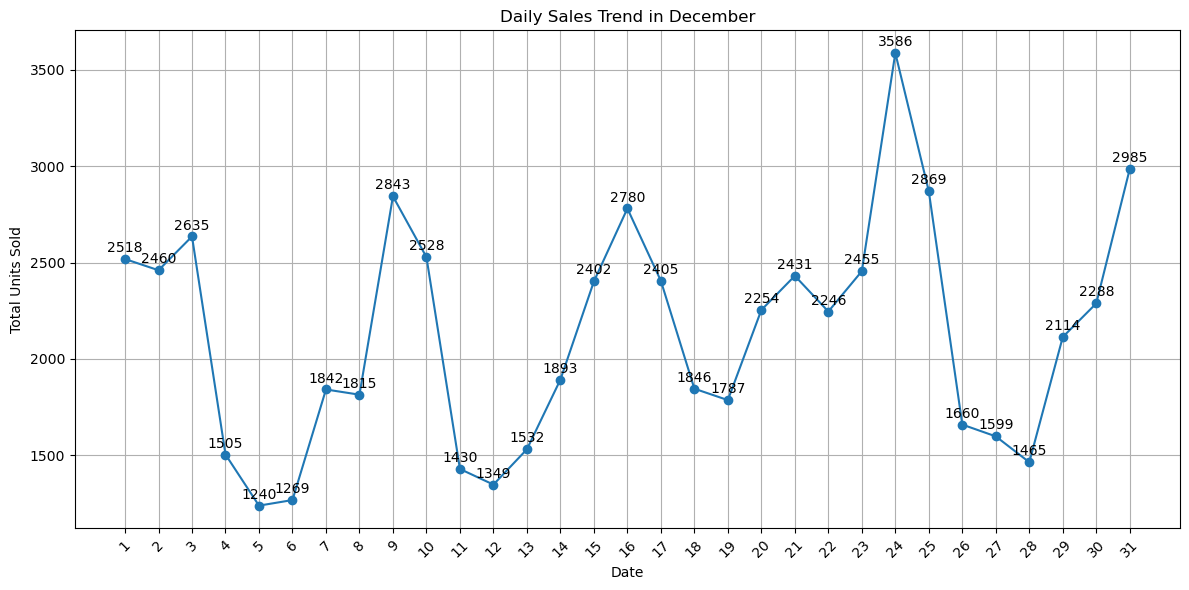

In [32]:
# Filter data for December
december_sales = sales[sales['Date'].dt.month == 12]

# Calculate total sales per day
daily_sales_december = december_sales.groupby(december_sales['Date'].dt.date)['Units'].sum().reset_index()
daily_sales_december.columns = ['Date', 'Total_Units']
daily_sales_december['Date'] = pd.to_datetime(daily_sales_december['Date'])
daily_sales_december['Day'] = daily_sales_december['Date'].dt.day

# Create a line chart to view daily sales trend in December
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_december['Day'], daily_sales_december['Total_Units'], marker='o', linestyle='-')
plt.title('Daily Sales Trend in December')
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.xticks(daily_sales_december['Day'], rotation=45) 
plt.grid()

# Add labels for each point
for i in range(len(daily_sales_december)):
    plt.annotate(daily_sales_december['Total_Units'].iloc[i],
                 (daily_sales_december['Day'].iloc[i], daily_sales_december['Total_Units'].iloc[i]),
                 textcoords="offset points",
                 xytext=(0, 5), 
                 ha='center')

plt.tight_layout()  
plt.show()

The daily sales in December 2017 showed significant fluctuations, with the highest total units sold on **December 24 (3,586 units)** and the lowest on December 5 (1,240 units). An increase in sales was observed leading up to Christmas, with a peak on December 24, indicating that many consumers were making purchases for holiday gifts. Additionally, sales on December 31 were also quite high, reaching 2,985 units, reflecting the year-end shopping trend, where people often shop to prepare for the New Year. Overall, this trend reflects a common seasonal shopping pattern, where consumers are **more likely to shop around major holidays like Christmas and New Year's.**

## 7. What are the mean, median, standard deviation, skewness, and kurtosis for product prices, units sold, and revenue?

In [33]:
# Merge sales and product data
merged_df = pd.merge(sales, products, on='Product_ID')

# Calculate revenue
merged_df['Revenue'] = merged_df['Product_Price'] * merged_df['Units']

# Calculate descriptive statistics
statistics = {
    'product_price': {
        'mean': merged_df['Product_Price'].mean(),
        'median': merged_df['Product_Price'].median(),
        'std_dev': merged_df['Product_Price'].std(),
        'skewness': merged_df['Product_Price'].skew(),
        'kurtosis': merged_df['Product_Price'].kurtosis()
    },
    'units': {
        'mean': merged_df['Units'].mean(),
        'median': merged_df['Units'].median(),
        'std_dev': merged_df['Units'].std(),
        'skewness': merged_df['Units'].skew(),
        'kurtosis': merged_df['Units'].kurtosis()
    },
    'revenue': {
        'mean': merged_df['Revenue'].mean(),
        'median': merged_df['Revenue'].median(),
        'std_dev': merged_df['Revenue'].std(),
        'skewness': merged_df['Revenue'].skew(),
        'kurtosis': merged_df['Revenue'].kurtosis()
    }
}

# Display the result
statistics_df = pd.DataFrame(statistics).T
statistics_df

,mean,median,std_dev,skewness,kurtosis
product_price,13.772327,12.99,8.664794,1.380421,2.354840
units,1.315103,1.00,0.830701,4.501928,48.049534
revenue,17.418587,14.99,15.522069,5.702361,121.097143


- **Product Price**: With a mean of approximately 13.77 and a high standard deviation of 8.66, there is a broad range of toy prices, suggesting a mix of affordable and premium products in the market.
- **Units Sold**: A mean of 1.32 units per sale and high skewness (4.5) indicate that most transactions involve a small quantity of units, with a few outliers showing bulk purchases.
- **Revenue**: The revenue distribution has a high skewness (5.7) and kurtosis (121.1), pointing to a few transactions generating significantly higher revenue, possibly from higher-priced toys or bulk purchases.

For a toy business, this suggests the need to focus on both affordable and high-value toys, while targeting promotions or strategies that can drive bulk purchases and increase revenue per sale.

## 8. Was there a significant relationship between product price and units sold in Q4 2017?

In [34]:
# Calculate the Spearman correlation coefficient
spearman_corr, p_value = stats.spearmanr(merged_df['Product_Price'], merged_df['Units'])

# Display the results
print('Spearman Correlation Coefficient:', spearman_corr)
print('P-value:', p_value)

# Draw a conclusion from the results
if p_value < 0.05:
    print('There is a significant relationship between product price and units sold.')
else:
    print('There is no significant relationship between product price and units sold.')

Spearman Correlation Coefficient: -0.11978381465154844
P-value: 0.0
There is a significant relationship between product price and units sold.


- The Spearman correlation coefficient of **-0.1198** indicates a **significant negative relationship** between product price and the number of units sold. This means that as the product price increases, the number of units sold tends to decrease.

- The very small p-value (**0.0**) suggests that this relationship is statistically significant. This indicates that the likelihood of the relationship occurring by chance is very low.

It can be concluded that there is a **significant relationship** between product price and the number of units sold, although the relationship is relatively weak.

## 9. How was the revenue distribution in Q3 2017 and Q4 2017?

In [35]:
# Filtering data for Q3 2017 and Q4 2017
filtered_df = merged_df[merged_df['Quarter'].isin(['2017Q3', '2017Q4'])]

# Calculating descriptive statistics
stats = filtered_df.groupby('Quarter')['Revenue'].describe()
stats

# Calculating skewness and kurtosis
skewness = filtered_df.groupby('Quarter')['Revenue'].apply(lambda x: x.skew())
kurtosis = filtered_df.groupby('Quarter')['Revenue'].apply(lambda x: x.kurtosis())
print(f"Skewness:\n{skewness}\n")
print(f"Kurtosis:\n{kurtosis}\n")

Skewness:
Quarter
2017Q3    2.980123
2017Q4    5.213026
Name: Revenue, dtype: float64

Kurtosis:
Quarter
2017Q3    15.870532
2017Q4    69.349044
Name: Revenue, dtype: float64



The high skewness and kurtosis values for Q3 and Q4 2017 indicate that while most transactions have low revenue, a few large sales significantly affect the overall revenue. This suggests that high-value sales or key promotions are driving the revenue. For the business, focusing on increasing high-value product sales or leveraging peak sales periods could boost overall revenue while still maintaining regular smaller sales.

## 10. Was there a significant difference in revenue growth between Q3 2017 to Q4 2017 and Q3 2018 to Q4 2018?

In [36]:
# Merge data with product stock from inventory
merged_df = pd.merge(merged_df, inventory[['Product_ID', 'Stock_On_Hand']], on='Product_ID', how='left')

# Filter data for Q4 2017
q4_2017_data = merged_df[merged_df['Quarter'] == '2017Q4']

# Calculate Spearman correlation coefficient
correlation, p_value = stats.spearmanr(q4_2017_data['Stock_On_Hand'], q4_2017_data['Units'])

# Spearman correlation test
print(f'Spearman Correlation Coefficient: {correlation}')
print(f'P-value: {p_value}')

# Hypothesis test
if p_value < 0.05:
    print("There is a significant relationship between product stock and total units sold.")
else:
    print("There is no significant relationship between product stock and total units sold.")


Spearman Correlation Coefficient: 0.044756452639846546
P-value: 0.0
There is a significant relationship between product stock and total units sold.


The significant relationship between **product category** and **bulk purchasing** suggests that certain categories are more likely to be bought in larger quantities. Businesses can capitalize on this by offering **bulk discounts**, creating **value bundles**, and ensuring optimal **stock levels** for high-demand categories. Targeted marketing and loyalty programs can also drive bulk purchases, helping businesses maximize sales, improve customer satisfaction, and streamline inventory, especially during peak seasons.

The Spearman correlation coefficient of 0.051 shows a very weak positive relationship between **stock on hand** and **total units sold**. This means that while higher stock levels slightly correlate with higher sales, the impact is minimal.

However, this insight highlights the importance of maintaining **adequate stock levels** during periods of high demand. Even though the correlation is weak, ensuring that products are always readily available when demand peaks can prevent missed sales opportunities. Strategically managing inventory to align with demand spikes, such as during holiday seasons or promotional events, can help optimize sales performance.

## 11. Is there a relationship between product categories and the tendency to make bulk purchases?

To determine if there is a relationship between product category and the tendency for bulk purchases, a Chi-Square test is appropriate.

The Chi-Square test is chosen because it can assess the independence between two categorical variables. In this case, the product category and the number of units purchased can be categorized.

Hypotheses:
- **Null Hypothesis (H0):** There is no relationship between product category and the tendency for bulk purchases.
  
- **Alternative Hypothesis (H1):** There is a relationship between product category and the tendency for bulk purchases.

In [37]:
# Calculating the median of units sold
median_units = merged_df['Units'].median()

# Creating a new column for purchase category
merged_df['Purchase_Category'] = ['Large' if x > median_units else 'Small' for x in merged_df['Units']]

# Creating a contingency table
contingency_table = pd.crosstab(merged_df['Product_Category'], merged_df['Purchase_Category'])

# Performing the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Displaying the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
if p < 0.05:
    print("There is a significant relationship between product category and the tendency for bulk purchases.")
else:
    print("There is no significant relationship between product category and the tendency for bulk purchases.")

Chi-Square Statistic: 711048.494646197
P-value: 0.0
There is a significant relationship between product category and the tendency for bulk purchases.


The significant relationship between **product category** and **bulk purchasing** suggests that certain categories are more likely to be bought in larger quantities. Businesses can capitalize on this by offering **bulk discounts**, creating **value bundles**, and ensuring optimal **stock levels** for high-demand categories. Targeted marketing and loyalty programs can also drive bulk purchases, helping businesses maximize sales, improve customer satisfaction, and streamline inventory, especially during peak seasons.

## 12. What are the estimated minimum and maximum revenue increases based on the percentage growth between Q3 2017 and Q4 2017?

In [38]:
# Get revenue for Q3 2017 and Q4 2017
revenue_q3_2017 = quarterly_revenue.loc[quarterly_revenue['Quarter'] == '2017Q3', 'Revenue'].values[0]
revenue_q4_2017 = quarterly_revenue.loc[quarterly_revenue['Quarter'] == '2017Q4', 'Revenue'].values[0]

# Calculate percentage increase
percentage_increase = ((revenue_q4_2017 - revenue_q3_2017) / revenue_q3_2017) * 100

# Get revenue for Q3 2018
revenue_q3_2018 = quarterly_revenue.loc[quarterly_revenue['Quarter'] == '2018Q3', 'Revenue'].values[0]

# Estimate revenue for Q4 2018
estimated_revenue_min = revenue_q3_2018 * (1 + (percentage_increase * 0.9 / 100))  # Minimum estimate
estimated_revenue_max = revenue_q3_2018 * (1 + (percentage_increase * 1.1 / 100))  # Maximum estimate

# Calculate percentage increase from Q3 2018 to the minimum estimate for Q4 2018
percentage_increase_from_q3_to_estimated_min = ((estimated_revenue_min - revenue_q3_2018) / revenue_q3_2018) * 100
percentage_increase_from_q3_to_estimated_max = ((estimated_revenue_max - revenue_q3_2018) / revenue_q3_2018) * 100

# Display results
print('Estimated Minimum Revenue Q4 2018:', estimated_revenue_min)
print('Estimated Maximum Revenue Q4 2018:', estimated_revenue_max)
print('Percentage Increase from Q3 2018 to Estimated Minimum Q4 2018:', percentage_increase_from_q3_to_estimated_min)
print('Percentage Increase from Q3 2018 to Estimated Maximum Q4 2018:', percentage_increase_from_q3_to_estimated_max)

Estimated Minimum Revenue Q4 2018: 2776617.109691175
Estimated Maximum Revenue Q4 2018: 2916438.598511437
Percentage Increase from Q3 2018 to Estimated Minimum Q4 2018: 29.30011732966508
Percentage Increase from Q3 2018 to Estimated Maximum Q4 2018: 35.811254514035134


Based on the estimates, the **minimum revenue for Q4 2018** is predicted to be around **Rp2,776,617.11**, with a percentage increase of **29.30%** from Q3 2018. Meanwhile, the **maximum revenue** is estimated to reach **Rp2,916,438.60**, with an increase of **35.81%**.

Therefore, the target revenue increase of 35% is very achievable, as it falls within this estimated range.

# Conclusion

## Recap

1. **Sales Trends and Product Categories:**
   - Monthly sales show a pattern of increase from Q1 to Q2, a decline in Q3, and a surge in Q4.
   - The most purchased product categories are Arts & Crafts and Toys, with top-selling products like Colorbuds and Barrel O’Slime.

2. **Purchase Timing and Location:**
   - December 24th and 31st had the highest purchase dates, while the location with the highest sales is Downtown.
   - Week 1 and Week 3 also show purchasing trends, though there is no significant validity for these time patterns.

3. **Descriptive Statistics and Correlations:**
   - Product price, units, and revenue distributions are not normal, with a negative correlation between price and units sold.
   - There is a positive correlation between units sold and inventory stock, as well as a significant relationship between product category and bulk purchases.

## Summary

Toy sales experienced a significant spike in Q4. **The 35% revenue increase target in Q4 2018 is achievable** if **Maven Toys optimizes efficient sales strategies**, including **inventory management** and **appropriate promotions**.

## Recommendations

Based on the analysis, there is strong indication that achieving a 35% revenue increase in Q4 2018 is feasible. Seasonal patterns and success in specific product categories provide opportunities to further drive sales. To achieve this target, the recommended strategies include:

1. **Create Bundles**: Combine best-selling products with slower-moving items in bundles to increase the appeal of less popular products.
   
2. **Product Bundle Packages**: Offer attractive product bundles to encourage customers to purchase more items at once, increasing overall sales volume.
   
3. **Segmented Discounts**: Apply targeted discounts on top-selling products during high-sales periods, such as December 24th and 31st, in high-performing locations. For lower-performing locations, offer smaller discounts to attract sales without sacrificing too much margin.

4. **Optimize Inventory**: Monitor stock levels in real-time. Increase stock for high-demand products and ensure quick restocking to prevent product shortages.

5. **Targeted Marketing Campaigns**: Launch marketing campaigns based on consumer buying patterns, especially for bulk-purchase-prone product categories, to maximize customer engagement and boost sales during peak seasons.

6. **Loyalty Programs**: Offer loyalty rewards for customers purchasing in bulk or purchasing from high-demand categories, encouraging repeat business and larger purchases. 

7. **Seasonal Promotions**: Plan for seasonal promotions that capitalize on high-purchase periods, aligning discounts and offers with customer shopping behaviors during peak months.

By implementing these strategies, it is expected that Marven Toys can reach the 35% revenue target in Q4 2018.